In [33]:
%matplotlib inline

In [34]:
import numpy as np
from scipy.sparse.linalg import spsolve
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from condlib import conductance_matrix_WRITE
from timeit import default_timer as timer

In [35]:
# Memory array parameters
rL = 12
rHRS = 1e5
n = 64
vWrite = [0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

In [36]:
hubList = []
lsbList = []

In [37]:
for v in vWrite:
    # Voltages for BLs and WLs (V/3 write scheme in this case)
    vBLsel = 0.0
    vBLnsel = 2.0 * v / 3.0
    vWLsel = v
    vWLnsel = 1.0 * v / 3.0

    start_t = timer()
    # Create conductance matrix
    conductancematrix, iinvector = conductance_matrix_WRITE(n, rL, rHRS,
                                                            vWLsel, vWLnsel, vBLsel, vBLnsel,
                                                            isel=n-1, jsel=n-1, verbose=False)
    # Convert to sparse matrix (CSR)
    conductancematrix = csr_matrix(conductancematrix)
    # Solve
    voltages = spsolve(conductancematrix, iinvector)
    stop_t = timer()

    print "{:.4f} sec".format(stop_t - start_t)

    WLvoltages = voltages[:n*n].reshape((n, n))
    BLvoltages = voltages[n*n:].reshape((n, n))
    
    print WLvoltages[0][0]
    print BLvoltages[0][0]

    hub = abs(BLvoltages[0][0] - WLvoltages[0][0])
    lsb = abs(BLvoltages[n-1][n-1] - WLvoltages[n-1][n-1])
    hubList.append(hub)
    lsbList.append(lsb)

    print "Write voltage          : {:.4f} V".format(v)
    print "Highest unselected bit : {:.4f} V".format(hub)
    print "Lowest selected bit    : {:.4f} V".format(lsb)

0.9782 sec
0.167729885761
0.332270114239
Write voltage          : 0.5000 V
Highest unselected bit : 0.1645 V
Lowest selected bit    : 0.4162 V
0.9346 sec
0.335459771523
0.664540228477
Write voltage          : 1.0000 V
Highest unselected bit : 0.3291 V
Lowest selected bit    : 0.8325 V
0.9353 sec
0.670919543046
1.32908045695
Write voltage          : 2.0000 V
Highest unselected bit : 0.6582 V
Lowest selected bit    : 1.6650 V
0.9621 sec
1.00637931457
1.99362068543
Write voltage          : 3.0000 V
Highest unselected bit : 0.9872 V
Lowest selected bit    : 2.4975 V
0.9182 sec
1.34183908609
2.65816091391
Write voltage          : 4.0000 V
Highest unselected bit : 1.3163 V
Lowest selected bit    : 3.3300 V
1.0417 sec
1.67729885761
3.32270114239
Write voltage          : 5.0000 V
Highest unselected bit : 1.6454 V
Lowest selected bit    : 4.1625 V
1.0353 sec
2.01275862914
3.98724137086
Write voltage          : 6.0000 V
Highest unselected bit : 1.9745 V
Lowest selected bit    : 4.9950 V


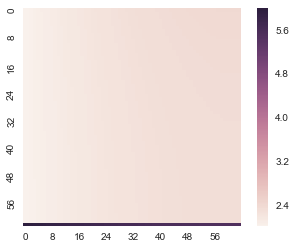

In [38]:
sns.heatmap(WLvoltages, square=True, xticklabels=n/8, yticklabels=n/8)

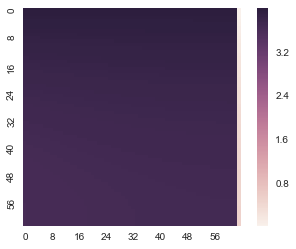

In [39]:
sns.heatmap(BLvoltages, square=True, xticklabels=n/8, yticklabels=n/8)

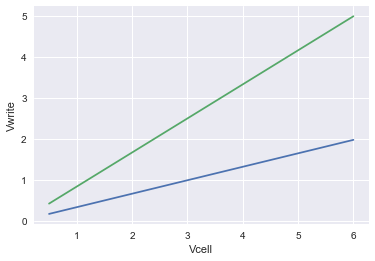

In [40]:
plt.plot(vWrite, hubList, vWrite, lsbList)
plt.ylabel("Vwrite")
plt.xlabel("Vcell")
plt.show()